In [1]:
# import numpy for numerical and mathematical operations
import numpy as np

# import pandas for data manipulation and CSV file handling
import pandas as pd

# import matplotlib for basic plotting and visualization
import matplotlib.pyplot as plt

# import seaborn for advanced statistical visualizations
import seaborn as sns

In [2]:
# read the wine dataset from a CSV file and select only the first 3 columns
df = pd.read_csv('wine_data.csv', header=None, usecols=[0, 1, 2])

# assign meaningful column names
df.columns = ['Class label', 'Alcohol', 'Malic acid']

In [3]:
# display the dataframe to inspect the first few rows
df

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

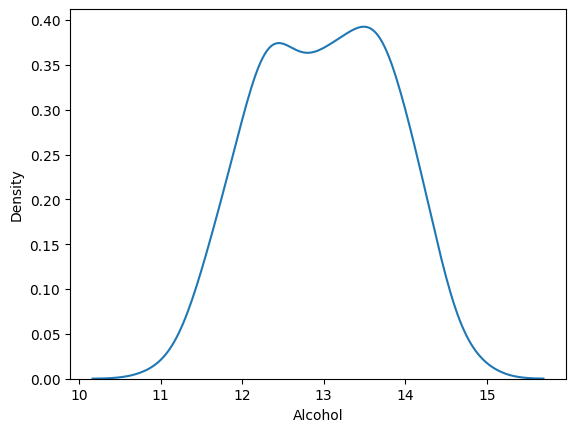

In [4]:
# plot the distribution of the 'Alcohol' feature using a kernel density estimate (KDE)
sns.kdeplot(df, x="Alcohol")

<Axes: xlabel='Malic acid', ylabel='Density'>

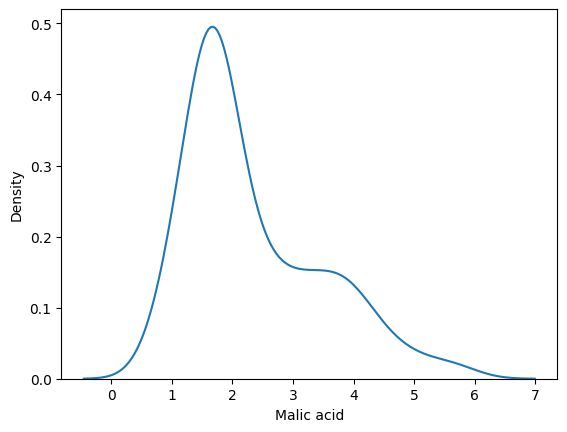

In [5]:
# plot the distribution of the 'Malic acid' feature using a kernel density estimate (KDE)
sns.kdeplot(df, x="Malic acid")

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

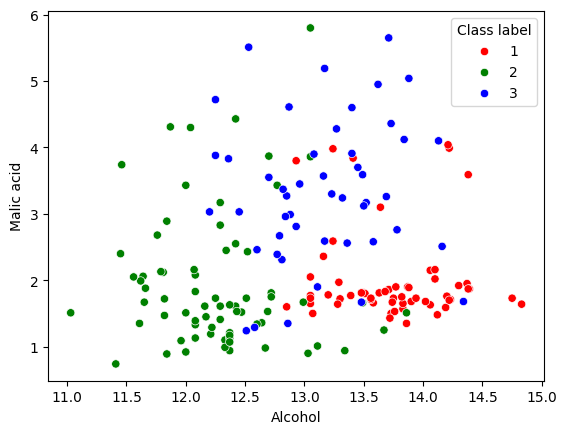

In [6]:
# create a scatter plot of Alcohol vs Malic acid colored by Class label
# different classes are shown in red, green, and blue
class_color_palette = {1: 'red', 2: 'green', 3: 'blue'}
sns.scatterplot(
    data=df,
    x='Alcohol',
    y='Malic acid',
    hue='Class label',
    palette=class_color_palette
)

In [7]:
# import train_test_split to divide data into training and testing sets
from sklearn.model_selection import train_test_split

In [8]:
# split the dataset into training and testing sets
# 70% training data, 30% testing data
x_train, x_test, y_train, y_test = train_test_split(
    df.drop('Class label', axis=1),  # feature columns
    df['Class label'],               # target column
    test_size=0.3,                   # 30% data for testing
    random_state=0                   # fixed seed for reproducibility
)

In [9]:
# check the number of rows and columns in training and testing feature sets
x_train.shape, x_test.shape

((124, 2), (54, 2))

In [10]:
# import MinMaxScaler to scale features between 0 and 1
from sklearn.preprocessing import MinMaxScaler

# create a scaler object
scaler = MinMaxScaler()

# fit the scaler on the training data to learn min and max values
scaler.fit(x_train)

# transform both training and testing data
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [11]:
# convert the scaled numpy arrays back into pandas dataframes
# this keeps the column names for easier reading and analysis
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [12]:
# display summary statistics of the training data, rounded to 1 decimal place
np.round(x_train.describe(), 1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [13]:
# display summary statistics of the scaled training data, rounded to 1 decimal place
# after scaling, mean should be close to 0 and std close to 1
np.round(x_train_scaled.describe(), 1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


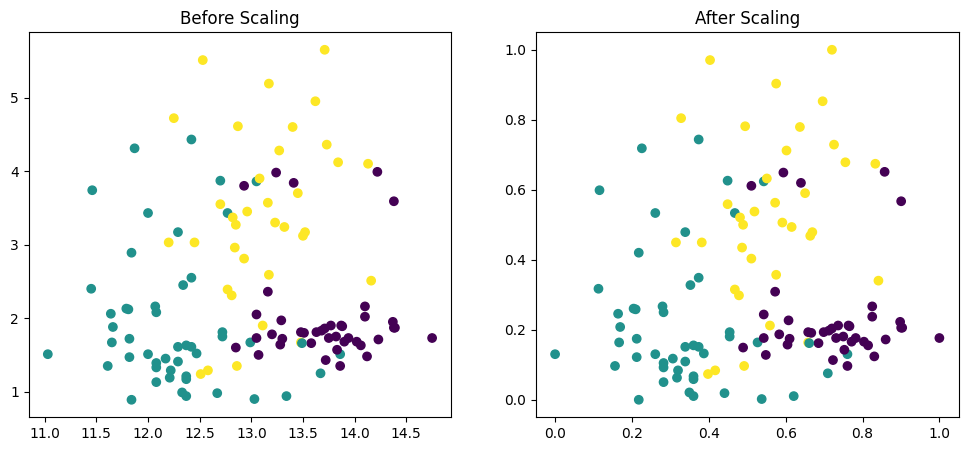

In [14]:
# create side-by-side scatter plots to compare features before and after scaling
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# scatter plot before scaling
ax1.scatter(x_train['Alcohol'], x_train['Malic acid'], c=y_train)
ax1.set_title("Before Scaling")

# scatter plot after scaling
ax2.scatter(x_train_scaled['Alcohol'], x_train_scaled['Malic acid'], c=y_train)
ax2.set_title("After Scaling")

# display the plots
plt.show()

# note: the overall distribution remains the same, but the feature values are now scaled

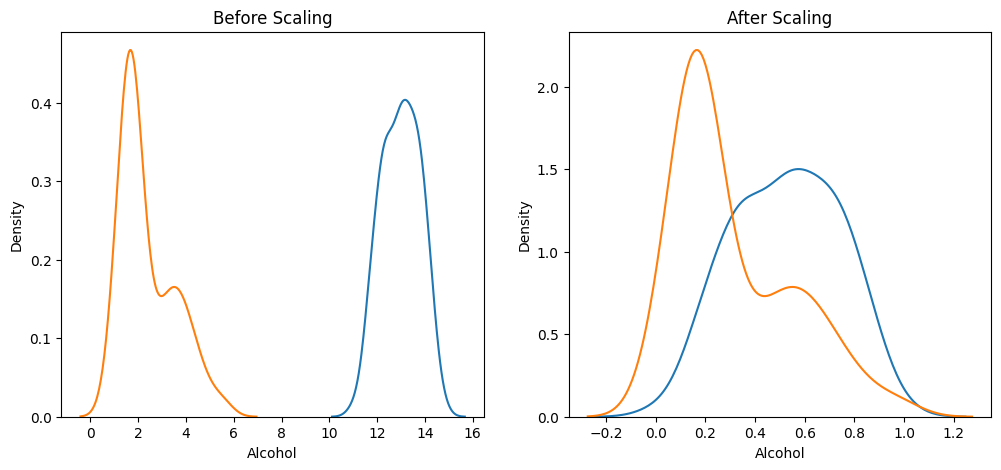

In [15]:
# create side-by-side kde plots to compare feature distributions before and after scaling
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title("Before Scaling")
sns.kdeplot(x_train['Alcohol'], ax=ax1)
sns.kdeplot(x_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title("After Scaling")
sns.kdeplot(x_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(x_train_scaled['Malic acid'], ax=ax2)

plt.show()

# note: after scaling, both features come into the same range [0,1], but their distributions remain the same

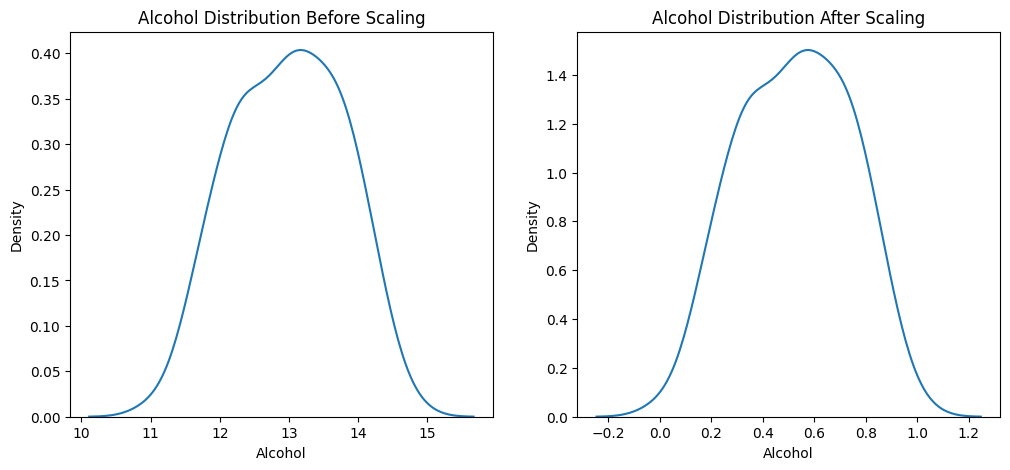

In [16]:
# create side-by-side kde plots for the 'Alcohol' feature before and after scaling
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title("Alcohol Distribution Before Scaling")
sns.kdeplot(x_train['Alcohol'], ax=ax1)

# after scaling
ax2.set_title("Alcohol Distribution After Scaling")
sns.kdeplot(x_train_scaled['Alcohol'], ax=ax2)

plt.show()

# note: distribution shape remains the same, but values are now scaled to 0-1 range

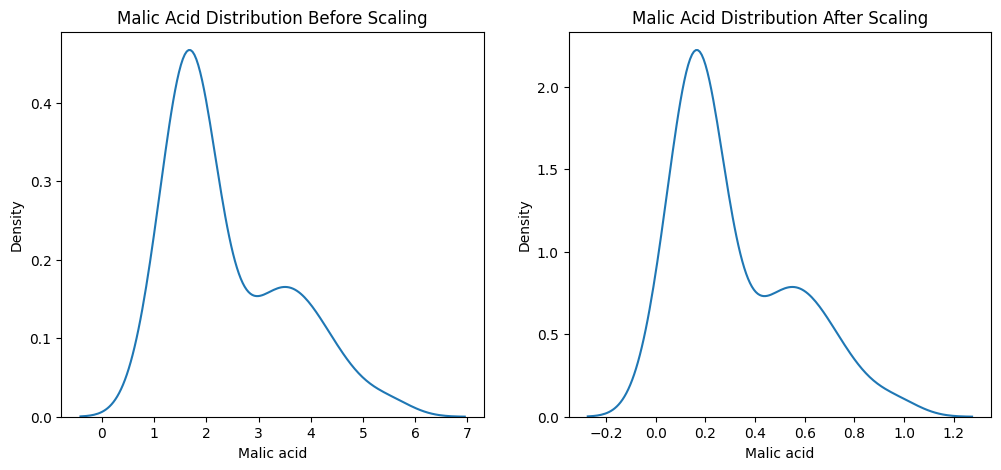

In [17]:
# create side-by-side kde plots for the 'Malic acid' feature before and after scaling
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title("Malic Acid Distribution Before Scaling")
sns.kdeplot(x_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title("Malic Acid Distribution After Scaling")
sns.kdeplot(x_train_scaled['Malic acid'], ax=ax2)

plt.show()

# note: scaling brings the feature values into the 0-1 range, but the overall distribution shape remains unchanged